## Current RTOFS results from NOAA

This is a quick viewer of NOAA (see http://nomads.ncep.noaa.gov) RTFOS Global

In [1]:
from ipywidgets import *

import numpy as np
from pydap.client import open_url
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.basemap import Basemap, shiftgrid


In [2]:
%matplotlib notebook

In [3]:
today=datetime.datetime.today()
dstamp=datetime.datetime.strftime(today,'%Y%m%d')

In [4]:
# for RTFOS Global
url='http://nomads.ncep.noaa.gov:9090/dods/rtofs/rtofs_global20160601/rtofs_glo_2ds_nowcast_3hrly_diag'.format(dstamp,dstamp)

In [5]:
dataset=open_url(url)

In [6]:
dataset.attributes

{'NC_GLOBAL': {'Conventions': ['COARDS', 'GrADS'],
  'dataType': 'Grid',
  'history': 'Wed Jun 01 03:02:06 UTC 2016 : imported by GrADS Data Server 2.0',
  'title': '2D Sfc 3 Hourly Diagnostic 00Z30may2016: Nowcast, downloaded Jun 01 02:57 UTC'}}

In [7]:
h = dataset['ssh'][:]
time = dataset['time']

In [25]:
print h.shape
print t.shape

(17, 1, 2160, 4320)
(17,)


In [8]:
misval=h.missing_value
misval

1.2676499957653196e+30

In [24]:
varname=h.long_name
varname

'sea_surface_elevation (m) '

In [36]:
hval=h['ssh'][:,0,:,:]

In [27]:
longitudes=h['lon'][:]
latitudes=h['lat'][:]

In [28]:
time = dataset['time']
time.attributes

{'grads_dim': 't',
 'grads_mapping': 'linear',
 'grads_min': '00z30may2016',
 'grads_size': '17',
 'grads_step': '3hr',
 'long_name': 'time',
 'maximum': '00z01jun2016',
 'minimum': '00z30may2016',
 'resolution': 0.125,
 'units': 'days since 1-1-1 00:00:0.0'}

In [29]:
t=time[:]

In [30]:
# timestamp
dstart=datetime.datetime.strptime(time.minimum,'%Hz%d%b%Y')
print dstart
dend=datetime.datetime.strptime(time.maximum,'%Hz%d%b%Y')
print dend
#check it
print dstart+datetime.timedelta(hours=60*3)

2016-05-30 00:00:00
2016-06-01 00:00:00
2016-06-06 12:00:00


In [31]:
# issue with the units CHECK
#date0=datetime.datetime(1,1,1,0,0)
#timestamp=[]
#for i in t:
# timestamp.append(date0+datetime.timedelta(days=i))
#timestamp

In [32]:
timestamp=[]
for i in range(61):
 timestamp.append(dstart+datetime.timedelta(hours=3*i))
#timestamp

In [51]:
def viewdata(i,latc=60,lonc=-60):
    
    latc=np.float(latc)
    lonc=np.float(lonc)
    i=np.int(i)
    
    lons, lats = np.meshgrid(longitudes,latitudes)

    # make orthographic basemap.
    m = Basemap(resolution='c',projection='ortho',lat_0=latc,lon_0=lonc)
#   m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=-180,urcrnrlon=180,resolution='c')
#    m = Basemap(projection='cyl',llcrnrlat=latitudes.min(),urcrnrlat=latitudes.max(),\
#              llcrnrlon=longitudes.min(),urcrnrlon=longitudes.max(),resolution='c')
    # create figure, add axes
    fig1 = plt.figure(figsize=(10,12))
    ax = fig1.add_axes([0.1,0.1,0.8,0.8])
    # set desired contour levels.
    hh=np.ma.masked_equal(hval[i,:,:],misval)
    clevs = np.linspace(hh.min(),hh.max(),10)
    
    # compute native x,y coordinates of grid.
    x, y = m(lons, lats)
    # define parallels and meridians to draw.
    parallels = np.arange(-90.,90,20.)
    meridians = np.arange(0.,360.,20.)
    # plot SLP contours.
 #   slpg,newlons = shiftgrid(180.,slp,longitudes,start=False)
 #   slpd,xx,yy = \
 #   m.transform_scalar(slpg,newlons,latitudes,181,181,returnxy=True,masked=True)
    CS1 = m.contourf(x,y,hh,clevs,cmap=plt.cm.RdBu_r,animated=True)
    CS2 = m.contour(x,y,hh,clevs,linewidths=0.5,colors='k',animated=True)

   # draw coastlines, parallels, meridians.
    m.drawcoastlines(linewidth=1.5)
    m.drawparallels(parallels)
    m.drawmeridians(meridians)
    # add colorbar
    cb = m.colorbar(CS1,"bottom", size="5%", pad="2%")
    cb.set_label('m')
    # set plot title
    ax.set_title(varname+' at '+datetime.datetime.strftime(timestamp[int(i)],'%d.%m.%Y:%H'))
    plt.show()

In [48]:
hh=np.ma.masked_equal(hval[1,:,:],misval)

In [50]:
hh.min()

-2.1279743

In [45]:
lonct=np.arange(0,360,10)
lonct=[w for w in map(str,lonct )]
latct=np.arange(-90,90,10)
latct=[w for w in map(str,latct )]
tt=np.arange(0,h.shape[0])
tt=[w for w in map(str,tt )]

<IPython.core.display.Javascript object>


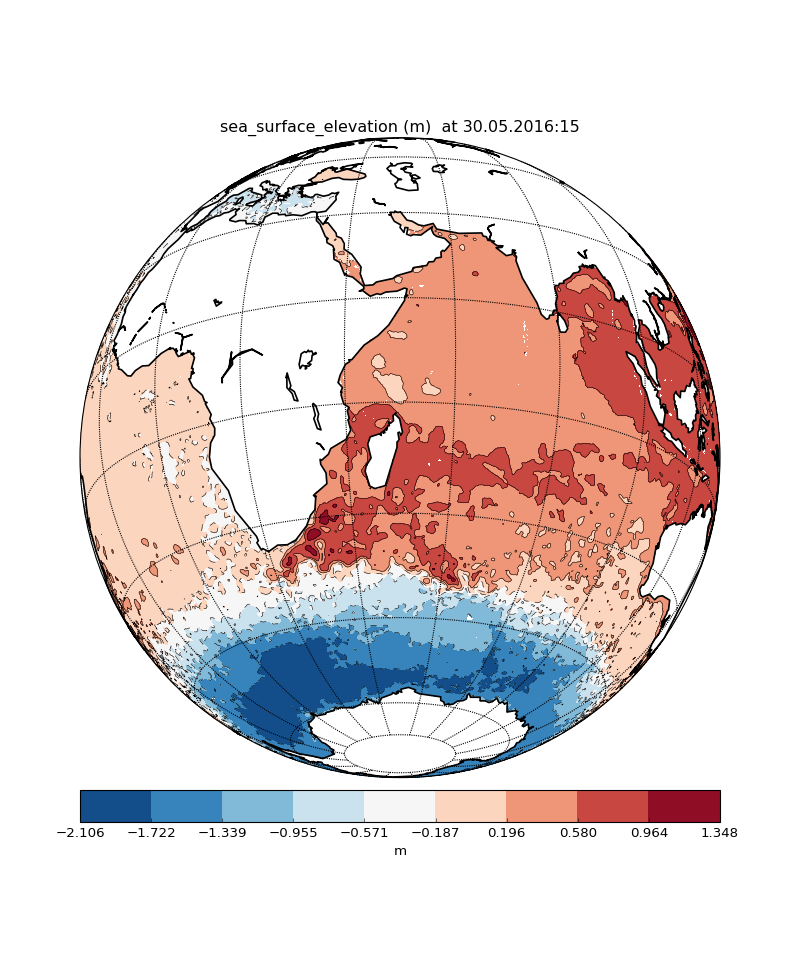

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [52]:
interact_manual(viewdata,i=tt,latc=latct,lonc=lonct)